# K-Means WordCloud

INSTALACIONES

In [1]:
!pip install -q nltk wordcloud scikit-learn matplotlib

LIBRERÍAS

In [2]:
import nltk
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import kagglehub
import os

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

CARGAR LAS RESEÑAS

In [39]:
# Cargar Dataset de Kaggle
path = kagglehub.dataset_download("efrodl/german-rap-dataset")
archivo = os.path.join(path+"/Bushido", "Bushido-alles-wird-gut-lyrics.txt")
with open(archivo, "r", encoding="utf-8") as f:
    resenas = f.readlines()

resenas = [r.strip() for r in resenas if r.strip()]  # Eliminar líneas vacías

Using Colab cache for faster access to the 'german-rap-dataset' dataset.


LIMPIEZA DEL TEXTO

In [41]:
stop_words = set(stopwords.words('german'))

def limpiar(texto):
    texto = texto.lower()
    texto = re.sub(r"[^\w\s]", "", texto)
    palabras = texto.split()
    palabras = [word for word in palabras if word not in stop_words]
    return " ".join(palabras)

resenas_limpias = [limpiar(r) for r in resenas]

VECTORIZACIÓN CON TF-IDF

In [42]:
vectorizador = TfidfVectorizer()
X = vectorizador.fit_transform(resenas_limpias)

CLUSTERING CON KMEANS

In [47]:
k = 5  # Suponemos n=5 grupos
modelo = KMeans(n_clusters=k, random_state=42, n_init=10)
modelo.fit(X)
etiquetas = modelo.labels_

ORGANIZAR LAS RESEÑAS POR CLUSTER

In [48]:
clusters = {i: [] for i in range(k)}
for idx, etiqueta in enumerate(etiquetas):
    clusters[etiqueta].append(resenas[idx])

MOSTRAR RESEÑAS DE CADA CLUSTER

In [49]:
for cluster, textos in clusters.items():
    print(f"\n--- CLUSTER {cluster} ---")
    for r in textos:
        print("-", r)


--- CLUSTER 0 ---
- Dieses Leben ist nicht immer dankbar, nein
- Dieses Leben ist nicht immer leicht
- Dieser Beton nennt sich 'Leben', Junge
- Junge, zeig ihnen, das ist dein Traum - du wirst ihn leben
- Denn wenn sie meinen, du hast hier nix verloren, dann zeig es ihn'!
- Junge, zeig ihnen das ist dein Traum - du wirst ihn leben
- Denn wenn sie meinen, du hast hier nix verloren, dann zeig es ihn'!
- Steh', steh' jetzt auf und zeig ihn' wer du bist, denn
- Steh', steh' jetzt auf und zeig ihn' wer du bist, denn
- Junge, zeig ihnen das ist dein Traum - du wirst ihn leben
- Denn wenn sie meinen, du hast hier nix verloren, dann zeig es ihn'!

--- CLUSTER 1 ---
- Yeah!
- Und manchmal denkst du, du bist ganz allein
- Und du begreifst nun, dass jeder auf dich scheißt
- Und du lässt jetzt deine Tränen raus und weinst
- Jeder versucht dir deine Träume auszureden
- Weil sie hoffen, dass du anfängst aufzugeben
- Und du fragst dich: Wann hört er bloß auf, der Regen?
- Können sie's einfach nicht 

NUBES DE PALABRAS POR CLUSTER


*** NUBE DE PALABRAS - CLUSTER 0 ***


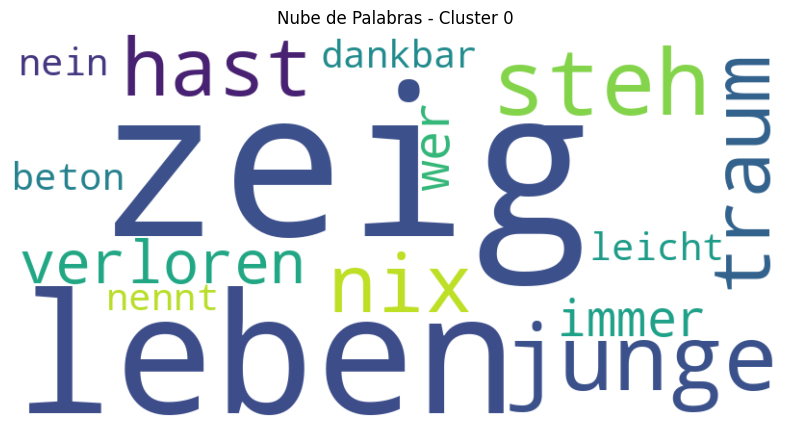


*** NUBE DE PALABRAS - CLUSTER 1 ***


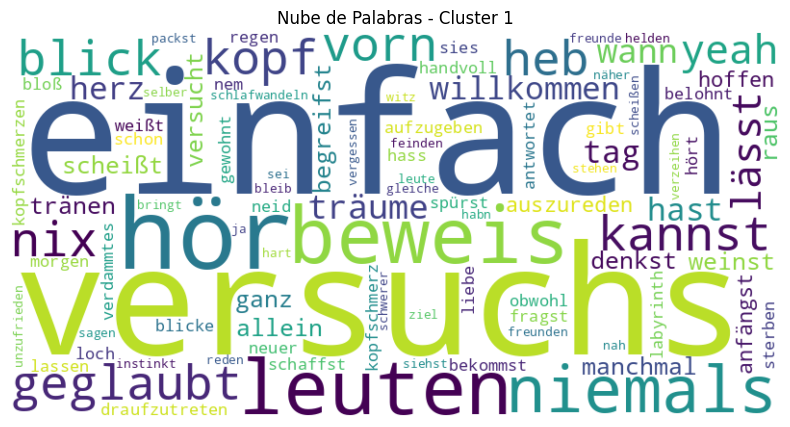


*** NUBE DE PALABRAS - CLUSTER 2 ***


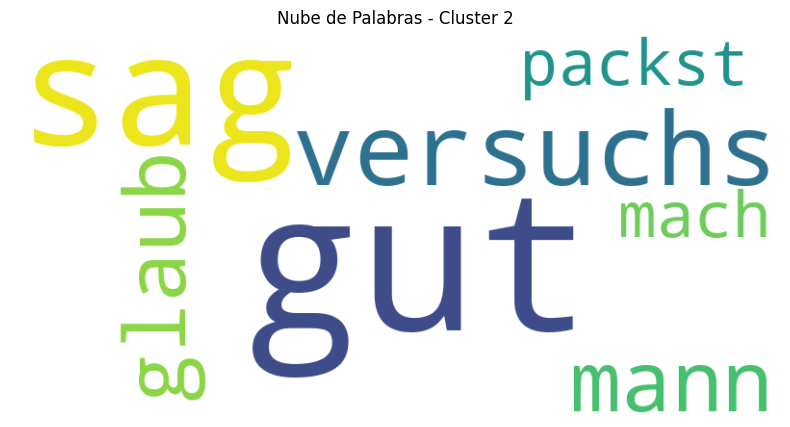


*** NUBE DE PALABRAS - CLUSTER 3 ***


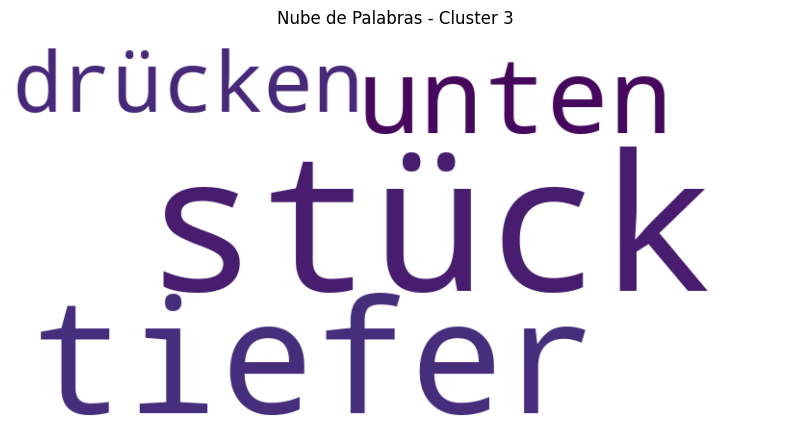


*** NUBE DE PALABRAS - CLUSTER 4 ***


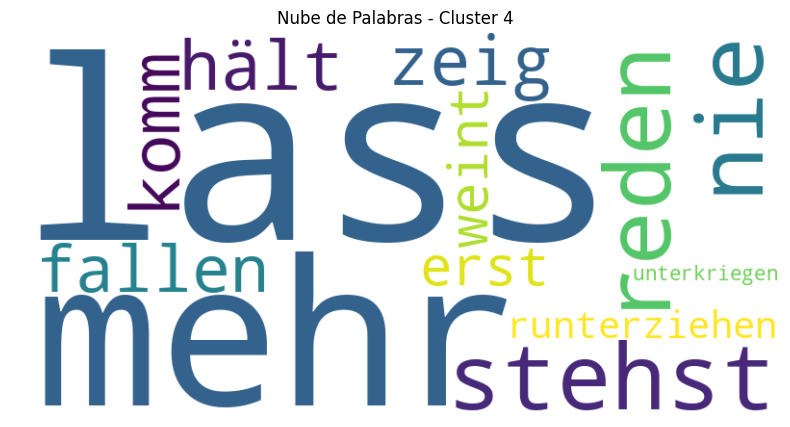

In [50]:
for cluster, textos in clusters.items():
    print(f"\n*** NUBE DE PALABRAS - CLUSTER {cluster} ***")
    texto_cluster = " ".join(textos)
    texto_cluster = limpiar(texto_cluster)
    nube = WordCloud(width=800, height=400, background_color='white').generate(texto_cluster)

    plt.figure(figsize=(10, 5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Nube de Palabras - Cluster {cluster}")
    plt.show()